In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
#first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
114957,73690,-2.197480,1.982629,0.259502,0.924323,-0.879938,-0.135952,-0.380186,0.611134,0.278764,0.746228,-1.427950,-0.025305,-0.206072,0.254171,0.612202,-0.723040,0.762576,-0.117120,2.178454,0.045666,-0.033516,-0.367199,-0.099698,-0.111166,-0.182825,0.427261,-0.895134,0.164611,9.51,0.0
114958,73690,-2.197480,1.982629,0.259502,0.924323,-0.879938,-0.135952,-0.380186,0.611134,0.278764,0.746228,-1.427950,-0.025305,-0.206072,0.254171,0.612202,-0.723040,0.762576,-0.117120,2.178454,0.045666,-0.033516,-0.367199,-0.099698,-0.111166,-0.182825,0.427261,-0.895134,0.164611,9.51,0.0
114959,73690,1.255655,0.293362,0.288616,0.701727,-0.447134,-1.093442,0.029565,-0.155947,0.160172,-0.257903,-0.209758,-0.213470,-0.617437,-0.119662,1.186461,0.518032,0.042988,-0.195785,-0.192785,-0.134786,-0.297287,-0.898954,0.139494,0.322281,0.187536,0.097228,-0.028586,0.029014,1.79,0.0
114960,73690,1.270638,-0.089535,-0.990690,-0.375303,0.652307,-0.073908,0.394543,-0.164288,-0.317251,0.054441,-0.062050,0.352671,0.383281,0.559560,0.178596,0.610500,-1.043495,0.364609,1.037631,0.136945,-0.067492,-0.344301,-0.372630,-1.296908,0.731021,1.152123,-0.131651,-0.024591,75.00,0.0
114961,73691,1.295784,0.049457,-1.301814,-0.476648,2.131357,3.184446,-0.494416,0.802781,-0.075014,-0.221156,0.131691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114962 entries, 0 to 114961
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    114962 non-null  int64  
 1   V1      114962 non-null  float64
 2   V2      114962 non-null  float64
 3   V3      114962 non-null  float64
 4   V4      114962 non-null  float64
 5   V5      114962 non-null  float64
 6   V6      114962 non-null  float64
 7   V7      114962 non-null  float64
 8   V8      114962 non-null  float64
 9   V9      114962 non-null  float64
 10  V10     114962 non-null  float64
 11  V11     114962 non-null  float64
 12  V12     114961 non-null  float64
 13  V13     114961 non-null  float64
 14  V14     114961 non-null  float64
 15  V15     114961 non-null  float64
 16  V16     114961 non-null  float64
 17  V17     114961 non-null  float64
 18  V18     114961 non-null  float64
 19  V19     114961 non-null  float64
 20  V20     114961 non-null  float64
 21  V21     11

In [ ]:
# checking the number of missing value in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,114719
1.0,242


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> Fraudulent Transaction




In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(114719, 31)
(242, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,114719.000000
mean,94.859137
std,257.024232
min,0.000000
25%,6.990000
50%,25.000000
75%,85.250000
max,19656.530000


In [ ]:
fraud.Amount.describe()

,Amount
count,242.000000
mean,119.435331
std,254.330814
min,0.000000
25%,1.000000
50%,8.565000
75%,99.990000
max,1809.680000


In [ ]:
# compare the values for both transations
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,46095.931415,-0.242322,-0.023224,0.698223,0.145973,-0.274923,0.096444,-0.102075,0.055820,-0.063634,-0.005629,0.220439,-0.016801,-0.009752,0.058315,0.199086,0.007049,0.069893,-0.088327,-0.019707,0.042648,-0.036798,-0.110409,-0.036248,0.011349,0.132138,0.026597,-0.000104,0.001924,94.859137
1.0,39270.280992,-5.942308,4.133122,-7.591109,4.716339,-4.227089,-1.524018,-6.307479,1.589037,-2.723048,-5.928648,4.288542,-6.718097,-0.080281,-7.390018,0.211112,-4.705020,-7.838852,-2.828544,0.762127,0.260058,1.348273,-0.332768,-0.105461,-0.111634,0.210822,0.086947,0.533591,0.065613,119.435331


Under-Sampling

Build a sample dataset containg similar distribution of normal transactions and fraudulent transactions

Number of Fraudulent Transactions --> 242

In [ ]:
legit_sample = legit.sample(n=242)

Concatenating Two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
97893,66426,1.372668,-0.398451,-0.120734,-0.687881,-0.596175,-0.970045,-0.030673,-0.331791,-1.143245,0.645863,-0.763437,-0.003466,0.758306,0.181455,0.701128,-1.254184,-0.145261,0.460430,-0.308418,-0.364236,-0.811456,-1.988520,0.191101,-0.138836,0.053850,0.649948,-0.080578,0.010798,45.90,0.0
98634,66743,0.405880,-1.006748,0.762518,2.616174,-0.590517,1.363613,-0.296803,0.390184,-0.205182,0.527168,0.386634,0.410426,-0.181139,0.024232,-0.174228,0.953264,-0.764078,0.459386,-0.985377,0.553694,0.350055,0.299710,-0.424136,-0.651235,0.238863,0.125069,-0.019232,0.074923,358.64,0.0
106281,69903,1.041690,-0.273671,1.323650,1.817734,-0.996035,0.383633,-0.610620,0.340265,1.437031,-0.380083,-1.051013,0.356471,-1.701966,-0.446869,-1.575277,-1.175945,0.971857,-1.289373,0.058710,-0.292996,-0.405559,-0.776319,0.134965,0.370311,0.333023,-0.526072,0.081337,0.030372,17.95,0.0
66320,51992,-1.223055,-0.920385,0.845225,-3.369855,2.144476,3.161028,-0.784845,1.057511,-1.085684,-0.413484,-0.416970,-1.058429,0.087870,-0.496522,0.153343,2.337844,-1.032728,-0.397722,-0.914170,0.383015,0.456105,0.688829,-0.205120,1.013881,0.784961,-0.278314,-0.016805,0.066079,69.99,0.0
6922,8964,-0.575660,0.582500,0.793565,-2.086391,0.725815,0.313623,0.730921,0.010101,1.907394,-1.831400,1.243939,-1.488601,1.790030,1.559490,-1.023140,-0.506044,0.097296,0.406689,0.383961,-0.192183,-0.178921,-0.138186,-0.255613,-1.202486,0.026961,-0.806294,0.014683,0.104125,39.95,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108258,70828,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,-1.232089,0.324239,-1.273935,-0.868686,-1.181945,1.027584,1.688132,0.256216,0.120608,-0.052346,0.329827,0.646616,-1.328132,0.189311,-0.005524,-0.814708,0.400924,0.286281,0.135215,0.257315,0.76,1.0
108708,71033,-3.170818,0.185735,-3.399852,3.761155,-2.148047,-1.598944,-2.519565,1.316215,-2.400106,-4.993417,4.447192,-5.293760,-1.419578,-6.425276,0.914083,-3.515197,-6.347453,-0.903512,1.191606,1.932254,1.092051,-0.041080,0.904395,0.180016,0.049970,-0.257100,0.859282,0.225924,426.40,1.0
111690,72327,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,-4.684233,4.376907,-5.007441,-1.304745,-6.192475,1.002404,-3.316934,-6.188834,-1.040413,1.233044,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90,1.0
112840,72824,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,0.334533,0.826375,0.196887,-1.885993,-0.472026,-0.578141,-1.243007,0.570460,-0.159057,0.407188,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,45.03,1.0
114271,73408,-2.869795,1.335667,-1.009530,1.693885,-0.741480,-0.796773,-2.614242,1.066636,-1.135497,-3.943337,2.572830,-2.288664,0.562084,-5.338714,-1.853252,-2.619233,-5.231425,-1.234854,0.397308,0.011557,0.528421,0.228027,-0.749298,-0.067179,0.215792,-0.453651,0.349191,0.198862,16.48,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,242
1.0,242


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,46276.557851,-0.271411,0.012618,0.686183,0.107792,-0.189735,0.062394,-0.149414,0.048465,0.033383,-0.058206,0.255787,0.001491,0.026643,0.105472,0.254430,0.008556,0.078569,-0.115642,-0.024306,0.033198,-0.064611,-0.099197,-0.094918,0.042261,0.102957,0.025090,-0.013406,0.001429,83.063760
1.0,39270.280992,-5.942308,4.133122,-7.591109,4.716339,-4.227089,-1.524018,-6.307479,1.589037,-2.723048,-5.928648,4.288542,-6.718097,-0.080281,-7.390018,0.211112,-4.705020,-7.838852,-2.828544,0.762127,0.260058,1.348273,-0.332768,-0.105461,-0.111634,0.210822,0.086947,0.533591,0.065613,119.435331


Splitting the data into features & targets

In [ ]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

         Time        V1        V2  ...       V27       V28  Amount
97893   66426  1.372668 -0.398451  ... -0.080578  0.010798   45.90
98634   66743  0.405880 -1.006748  ... -0.019232  0.074923  358.64
106281  69903  1.041690 -0.273671  ...  0.081337  0.030372   17.95
66320   51992 -1.223055 -0.920385  ... -0.016805  0.066079   69.99
6922     8964 -0.575660  0.582500  ...  0.014683  0.104125   39.95
...       ...       ...       ...  ...       ...       ...     ...
108258  70828  0.196707  1.189757  ...  0.135215  0.257315    0.76
108708  71033 -3.170818  0.185735  ...  0.859282  0.225924  426.40
111690  72327 -4.198735  0.194121  ...  1.249414 -0.131525  238.90
112840  72824 -1.111495 -0.257575  ...  0.026762 -0.358335   45.03
114271  73408 -2.869795  1.335667  ...  0.349191  0.198862   16.48

[484 rows x 30 columns]


In [ ]:
print(Y)

97893     0.0
98634     0.0
106281    0.0
66320     0.0
6922      0.0
         ... 
108258    1.0
108708    1.0
111690    1.0
112840    1.0
114271    1.0
Name: Class, Length: 484, dtype: float64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(484, 30) (387, 30) (97, 30)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000, verbose=1)  # Verbose will show the convergence process
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, verbose=1)

In [ ]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1.]


Accuracy Score

In [ ]:
# Accuracy
print("\nAccuracy:", accuracy_score(Y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Accuracy: 0.9484536082474226

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        49
         1.0       0.98      0.92      0.95        48

    accuracy                           0.95        97
   macro avg       0.95      0.95      0.95        97
weighted avg       0.95      0.95      0.95        97


Confusion Matrix:
 [[48  1]
 [ 4 44]]


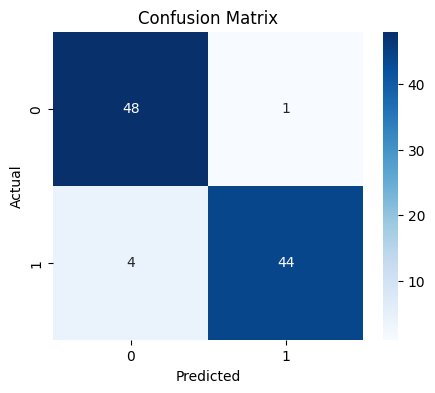

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()